# Hypothesis Testing - CaseStudies (Chi-Square, A/B Test, GeoTest Counterfactual)
**Alexandre Mathias DONNAT, Sr - Télécom Paris**

# **Partie I**

# Étude de Cas : Test du Chi-Deux pour l'Indépendance

## Problème
Nous voulons tester si la répartition des étudiants dans trois spécialités
(Informatique, Mathématiques, Physique) dépend de leur région d'origine
(Île-de-France, Rhône-Alpes, PACA). Pour ce faire, nous utiliserons un test du chi-deux.

## Hypothèses :
- H0 : La spécialité choisie est indépendante de la région d'origine.
- H1 : La spécialité choisie dépend de la région d'origine.

## Tableau de contingence observé
Le tableau ci-dessous montre le nombre d'étudiants dans chaque spécialité selon leur région :

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import chi2

In [2]:
# Tableau de contingence (observations)
data = np.array([[30, 25, 15],   # Île-de-France
                 [20, 15, 25],   # Rhône-Alpes
                 [25, 20, 15]])  # PACA

# Création d'un DataFrame pour une meilleure lisibilité
regions = ['Île-de-France', 'Rhône-Alpes', 'PACA']
specialties = ['Informatique', 'Mathématiques', 'Physique']
observed = pd.DataFrame(data, index=regions, columns=specialties)

# Affichage du tableau
observed


,Informatique,Mathématiques,Physique
Île-de-France,30,25,15
Rhône-Alpes,20,15,25
PACA,25,20,15


### Calcul manuel de la statistique du chi-deux et de la p-valeur


$i$ désigne les lignes du tableau et $j$ désigne les colonnes.


La statistique du $\chi^2$ est la suivante :
$$
\chi^2 = \sum_{i,j} \frac{(O_{ij} - E_{ij})^2}{E_{ij}}
$$
où $O_{ij}$ sont les valeurs observées et $E_{ij}$ sont les valeurs attendues sous l'hypothèse $H_0$. Ce qui veut dire que la propotion d'individus dans la matière $j$:
$
  \frac{E_{ij}}{\sum_k E_{ik}}
$ est indépendante de la région considérée $i$ pour tout $j$. Et aussi $\sum_j E_{ij} = \sum_j O_{ij}$







## Question
 Quel est le tableau $E_{ij}$ (sous la forme d'un `np.array` nommé *expected*) de la répartition attendue des étudiants ?


In [8]:
# Totaux
row_totals = observed.sum(axis=1)   # totaux lignes
col_totals = observed.sum(axis=0)   # totaux colonnes
total = observed.sum().sum()  # Grand total (somme de toutes les valeurs)

# Attendues
expected = np.outer(row_totals, col_totals) / total

# Mise en DataFrame
regions = ['Île-de-France', 'Rhône-Alpes', 'PACA']
specialites = ['Informatique', 'Mathématiques', 'Physique']

expected_df = pd.DataFrame(expected, index=regions, columns=specialites)

print("Fréquences attendues :")
print(expected_df.round(2))


Fréquences attendues :
               Informatique  Mathématiques  Physique
Île-de-France         27.63          22.11     20.26
Rhône-Alpes           23.68          18.95     17.37
PACA                  23.68          18.95     17.37


## Question:

Calculer la statisique du $\chi^2$ (variable *chi2_manual*).

In [10]:

# Statistique du chi-deux
chi2_manual = ((observed - expected)**2 / expected).sum().sum()

print(f"Statistique du chi-deux : {chi2_manual:.4f}")


Statistique du chi-deux : 7.1524


Ensuite, nous utilisons cette statistique pour calculer manuellement la p-valeur.

Cette p-valeur est obtenue à partir de la distribution du chi-deux en utilisant le nombre de degrés de liberté  $df = (r - 1) \times (c - 1)
$, où $ r $ est le nombre de lignes et $ c $ est le nombre de colonnes du tableau.

Si on note $t$ la statistique du $\chi^2$ calculée. $T$ une distribution du $\chi^2$ à $df$ degrès de liberté, la p-valeur est donnée par:
$$
   p_{val} := \mathbb P(T\ge t)
$$

### Visualisation :
- **Distribution du chi-deux** : Le premier graphique montre la courbe de la densité de probabilité du chi-deux pour les degrés de liberté donnés. La ligne verticale rouge représente la valeur du chi-deux observée dans notre cas.
- **Fonction de répartition complémentaire (1-CDF)** : Le second graphique montre la probabilité de dépassement de la statistique observée (1 - CDF). Cette courbe permet de visualiser la p-valeur obtenue.

*Rappel* Une distribution du $\chi^2$ à $df$ degrès de liberté est la loi de
$$
  \sum_{i=1}^{df} X_i^2,
$$
où $(X_i)\sim_{i.i.d.}\mathcal N(0,1)$.

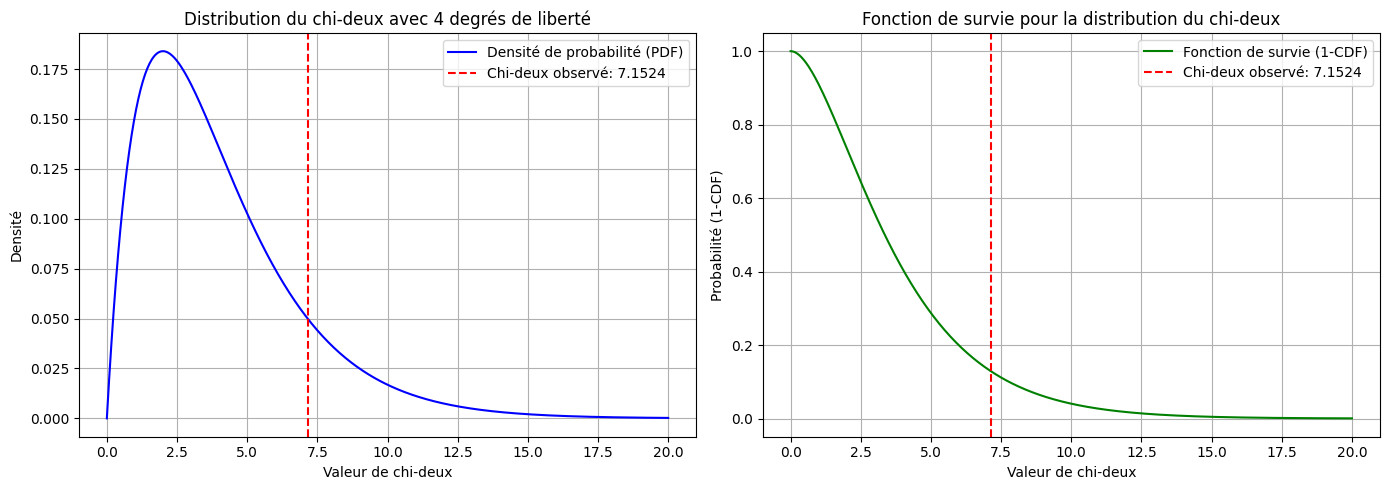

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Densité de probabilité (PDF)
axs[0].plot(x, y, label="Densité de probabilité (PDF)", color='blue')
axs[0].axvline(chi2_manual, color='red', linestyle='--', label=f"Chi-deux observé: {chi2_manual:.4f}")
axs[0].set_title(f"Distribution du chi-deux avec {dof} degrés de liberté")
axs[0].set_xlabel("Valeur de chi-deux")
axs[0].set_ylabel("Densité")
axs[0].legend()
axs[0].grid(True)

# Fonction de survie (1-CDF)
axs[1].plot(x, y_surv, label="Fonction de survie (1-CDF)", color='green')
axs[1].axvline(chi2_manual, color='red', linestyle='--', label=f"Chi-deux observé: {chi2_manual:.4f}")
axs[1].set_title("Fonction de survie pour la distribution du chi-deux")
axs[1].set_xlabel("Valeur de chi-deux")
axs[1].set_ylabel("Probabilité (1-CDF)")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


## Question
Calculez la p-valeur $p_{val}$ (variable *p_val_manual*) ?

In [29]:
# Calcul de la p-valeur manuellement à partir de la distribution du chi-deux

ddl = 4
chi2_manual = 7.1524

# p-valeur = 1 - CDF
p_val_manual = 1 - chi2.cdf(chi2_manual, ddl)

print(f"P-valeur calculée manuellement : {p_val_manual:.4f}")

P-valeur calculée manuellement : 0.1281


## Utilisation de la libriairie python


## Question

A l'aide de la fonction *chi2_contingency* (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html), retrouvez la p-valeur trouvé manuellement à la question précédente (donnez la valeur de *p_val*).




In [ ]:
# Test du chi-deux

from scipy.stats import chi2_contingency

# Test du chi-deux avec scipy
chi2_stat, p_val, ddl, expected = chi2_contingency(observed)

print(f"P-value : {p_val:.4f}")

P-value : 0.1280


## Question

Quelle conclusion tirez-vous en fonction de la valeur de cette p-valeur ? Dans notre cas, que pouvons-nous en déduire ? Que pouvons-nous dire de la taille de notre jeu de données quant à la validité du test que nous venons de réaliser ?

## Réponse  

La p-valeur obtenue (0.128) est supérieure au seuil de 5 %. Nous ne rejetons donc pas l’hypothèse d’indépendance : la spécialité choisie semble indépendante de la région. Autrement dit, il n’existe pas de lien statistiquement significatif entre la région d’origine et la matière préférée des étudiants dans ce jeu de données. Toutefois, avec un échantillon plus grand, un éventuel effet pourrait apparaître plus clairement.

# **Partie II**

# A/B Test : Impact d'une augmentation tarifaire sur le nombre d'adhérents

Dans cette seconde partie, nous allons simuler un A/B test pour une entreprise en ligne qui souhaite savoir si l'augmentation de son tarif d'abonnement va affecter le nombre d'adhérents.

- **Groupe A** : Ancien tarif appliqué à une majorité des habitants.
- **Groupe B** : Nouveau tarif appliqué à un minorité des habitants.

Les distributions démographiques des individus du groupe A et B sont similaires. \
Nous allons comparer les taux d'adhésion dans chaque groupe afin de déterminer si l'augmentation du tarif a un impact significatif sur le nombre d'adhérents.

#### Objectifs :
- Simuler un A/B test.
- Utiliser un test statistique pour comparer les taux de conversion entre deux groupes (A et B).


In [30]:
# Importation des données
data = pd.read_csv('ab_test_data.csv')

# Affichage d'un aperçu des données
data.head()


,Groupe,Adhérent
0,A,0
1,A,1
2,A,0
3,A,0
4,A,0


 Nous commencerons par calculer le taux d'adhésion dans chaque groupe.


### Test de proportion pour comparer les taux d'adhésion

Nous allons utiliser un **test de proportion** pour comparer les taux d'adhésion entre les deux groupes A et B. Ce test permet de vérifier si la différence entre les taux d'adhésion est statistiquement significative.

#### Hypothèses :
- **Hypothèse nulle $ H_0 $** : Il n'y a pas de différence significative entre les taux d'adhésion des deux groupes.
- **Hypothèse alternative $ H_1 $** : Il existe une différence significative entre les taux d'adhésion des deux groupes.






In [31]:
# Calcul du taux d'adhésion pour chaque groupe
conversion_A = data[data['Groupe'] == 'A']['Adhérent'].mean()
conversion_B = data[data['Groupe'] == 'B']['Adhérent'].mean()

print(f"Taux d'adhésion Groupe A (ancien tarif) : {conversion_A * 100:.2f}%")
print(f"Taux d'adhésion Groupe B (nouveau tarif) : {conversion_B * 100:.2f}%")


# Calcul des taux d'adhésion observés
success_A = data[data['Groupe'] == 'A']['Adhérent'].sum()
success_B = data[data['Groupe'] == 'B']['Adhérent'].sum()
n_A = len(data[data['Groupe'] == 'A'])
n_B = len(data[data['Groupe'] == 'B'])
t_A = success_A / n_A
t_B = success_B / n_B



Taux d'adhésion Groupe A (ancien tarif) : 10.00%
Taux d'adhésion Groupe B (nouveau tarif) : 8.90%


## Question

Ecrire un test pour valider ou non: l'hypothèse $H_0$ ?  (p-valeur, etc)


*indice*: Supposez que la statistique recherchée est la moyenne de $(X_i)_{1\le i\le n_a}$ et de $(Y_i)_{1\le i\le n_b}$ où $X_i\sim_{i.i.d} \text{Bernouilli}(p_a)$ et $Y_i\sim_{i.i.d} \text{Bernouilli}(p_b)$.
L'hypothèse $H_0$ est donc $p_a =p_b$.
Pour ecrire un test il faut ecrire un théorème central limite sur $X_i$ et $Y_i$ puis faire transformation affine du vecteur  $(\sqrt{n_a}\frac 1{n_a} \sum_{i=1}^{n_a}(X_i-p_a), \sqrt{n_b} \frac 1{n_b}\sum_{i=1}^{n_b} (Y_i-p_b))$ de telle sorte que les quantités inconnues $p_a=p_b$ disparaissent. Vous connaissez la loi limite de cette transformation affine et vous savez écrire la statistique

(code et théorie en expliquant les choix faits)

## Test d’hypothèse : impact du tarif sur le taux d’adhésion

On veut tester si le vrai taux d’adhésion est le même dans A et B.

**Hypothèses :**

- $H_0 : p_A = p_B$  (pas d’effet du prix)  
- $H_1 : p_A \neq p_B$  

**Modèle :**  
Chaque individu suit une loi de Bernoulli (adhère = 1, sinon 0).  
Les moyennes $\hat{p}_A$ et $\hat{p}_B$ sont les taux observés.  

Par le théorème central limite (TCL), la différence $\hat{p}_A - \hat{p}_B$ suit approximativement une loi normale.  

Sous $H_0$, on utilise le **pooled rate** :

$$
\hat{p} = \frac{n_A + n_B}{N_A + N_B}
$$

et on définit la statistique de test (z-test de proportions) :

$$
Z = \frac{\hat{p}_A - \hat{p}_B}{\sqrt{\hat{p}(1-\hat{p})\left(\frac{1}{N_A} + \frac{1}{N_B}\right)}}
$$


**Décision :**  
On calcule la p-valeur bilatérale et on conclut avec un seuil $\alpha = 5\%$.


In [37]:
from statsmodels.stats.proportion import proportions_ztest

# n = nombre de succès (abonnés)
success = [success_A, success_B]

# N = taille des groupes
nobs = [n_A, n_B]

# test bilatéral
stat, pval = proportions_ztest(success, nobs)

print("Statistique Z =", stat)
print("p-valeur =", pval)

if pval < 0.05:
    print("On rejette H0 : il existe une différence significative entre les deux groupes.")
else:
    print("On ne rejette pas H0 : la différence n’est pas significative.")


Statistique Z = 0.8408481165916647
p-valeur = 0.4004330274504795
On ne rejette pas H0 : la différence n’est pas significative.


## Interprétation

Avec les sorties obtenues :  

- Statistique $Z = 0.8408$  
- p-valeur $= 0.4004$  

Comme la p-valeur est **supérieure à 0.05**, on ne rejette pas l’hypothèse nulle $H_0$.  
La différence observée entre les taux d’adhésion des groupes A (ancien prix) et B (nouveau prix) n’est **pas statistiquement significative**.  
Au vu de cet échantillon, on ne peut pas conclure à un effet du prix sur l’adhésion.


# **Partie III**

Afin d'acquérir de nouveaux clients, une banque en ligne investit beaucoup d'argent Boogle Ads, afin d'apparaître dans les premiers résultats sponsorisés lors des recherches internet utilisant le moteur Boogle. La banque souhaite évaluer la pertinence de cet investissement.

La banque envisage d'abord de cesser momentanément l'investissement pour observer ce qui se passe. Cette solution est rejetée car le nombre d'abonnés est sujet à de fortes variations mensuelles : il serait donc impossible de déterminer si une éventuelle baisse du nombre d'abonnés est due à la coupure de Boogle Ads ou simplement aux tendances du marché (changement de conjoncture économique, tendances saisonnières, offres promotionnelles des banques concurrentes, etc.).

La banque décide d'effectuer un **geotest**. Elle décide de supprimer sa souscription à Boogle Ads uniquement dans une région de France, puis compare ce qui se passe dans cette région à ce qui se passe dans les autres régions, pour lesquelle la publicité a été maintenue.

In [12]:
# Dans cette étape, nous générons les données pour les 6 régions sur 30 mois. Les 12 premiers mois représentent
# la période avant la suppression de l'investissement publicitaire dans la région Est, et les 18 mois suivants
# incluent les 6 mois supplémentaires après la suppression. Chaque région a des données générées comme une somme
# d'un modèle AR commun et d'une variable gaussienne spécifique à chaque région avec une moyenne régionale.
# Après la suppression de l'investissement, la moyenne de la région Est change.

# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Paramètres communs
np.random.seed(42)
regions = ['Nord', 'Est', 'Ouest', 'Sud-ouest', 'Sud-Est', 'Centre']
n_months = 24
additional_months = 6
noise_std = 1  # Petite variance pour les variables aléatoires spécifiques aux régions
offset = 40

# Moyenne régionale m(i) pour chaque région (valeur avant et après suppression pour Est)
region_means = {
    'Nord': 9, 'Est': 8, 'Ouest': 15, 'Sud-ouest': 1, 'Sud-Est': 4, 'Centre': 2
}
region_mean_post_est = 3  # Nouvelle moyenne pour Est après suppression de l'investissement

# Paramètre AR commun à toutes les régions
ar_param = 0.7

# Génération des données AR communes
def generate_common_ar_data(n_months):
    data = [50]  # Valeur initiale arbitraire
    noise = np.random.normal(0, 5, n_months + additional_months)  # Bruit global
    for t in range(1, n_months + additional_months):
        data.append(ar_param * data[t-1] + noise[t])
    return np.array(data)

common_ar_data = generate_common_ar_data(n_months)

# Génération des données spécifiques à chaque région
def generate_region_data(region, n_months):
    mean = region_means[region]
    if region == 'Est':
      first_part = np.random.normal(mean, noise_std, n_months)
      second_part = np.random.normal(region_mean_post_est, noise_std, additional_months) # Changement de la moyenne pour Est après suppression
      noise = np.concatenate([first_part, second_part])
    else:
      noise = np.random.normal(mean, noise_std, n_months + additional_months)
    return common_ar_data[:n_months + additional_months] + noise + offset

# Génération des données avant et après suppression pour toutes les régions
data = {}
for region in regions:
    data[region] = generate_region_data(region, n_months)

# Mise en forme des données pour analyse
df = pd.DataFrame(data)
df.index = [f'{i+1}' for i in range(n_months + additional_months)]


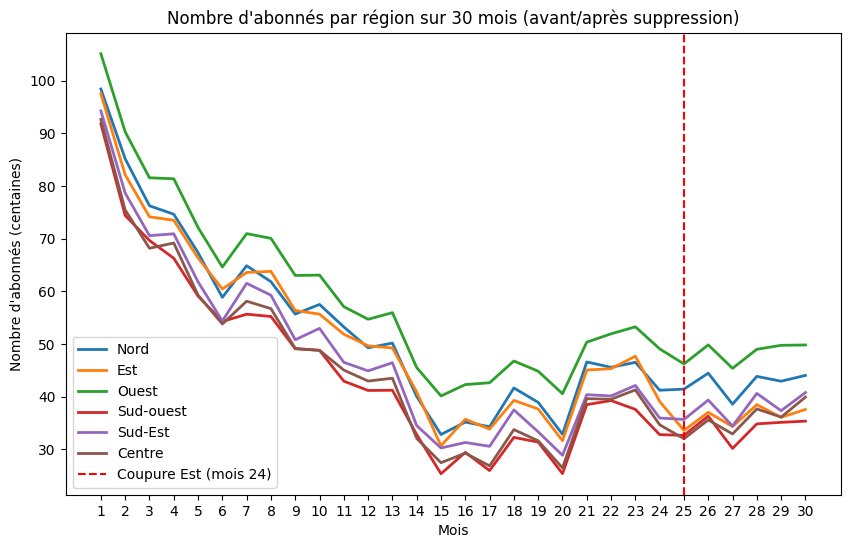

In [13]:
# Dans cette section, nous visualisons les séries temporelles pour chaque région avec une distinction de couleur
# entre la période avant et après la suppression de l'investissement publicitaire dans la région Est (mois 12).
# Les données sont tracées avec une ligne continue avant la suppression et une ligne en pointillés après.

# Visualisation des séries temporelles avec coloration avant/après suppression
plt.figure(figsize=(10,6))
for region in regions:
    plt.plot(df.index, df[region], label=f'{region}', linestyle='-', linewidth=2)

plt.axvline(x=n_months, color='r', linestyle='--', label='Coupure Est (mois 24)')
plt.title("Nombre d'abonnés par région sur 30 mois (avant/après suppression)")
plt.xlabel('Mois')
plt.ylabel('Nombre d\'abonnés (centaines)')
plt.legend()
plt.show()


**Première tentative** : un simple A/B test

In [14]:
# Dans cette étape, nous effectuons un A/B test pour comparer les abonnés de la région Est après la suppression
#  à ceux des autres régions. Nous utilisons un test de Student pour vérifier si l'impact de la suppression
# est significatif.

# A/B test pour analyser l'impact de la coupure de l'investissement publicitaire
pre_coupure = df['Est'][:n_months]
post_coupure = df['Est'][n_months:]

# Comparaison entre Est et autres régions après la coupure
post_coupure_others = df.drop(columns=['Est'])[n_months:]


# A/B test (Test t de Student)
t_stat, p_value = stats.ttest_ind(post_coupure, post_coupure_others.mean(axis=1))

print(f"Résultat du A/B test: t_stat={t_stat}, p_value={p_value}")


Résultat du A/B test: t_stat=-2.942588587970685, p_value=0.014720162219492544


## Question
Quelle conclusion semble donne cet A/B test ?

Quelle critique formulez vous à l'égard de cette méthodologie ?


### Réponse :
La p-valeur est inférieure à 0.05 donc on rejette l’hypothèse nulle H0 d’égalité des moyennes.
Donc, il existe une différence significative entre l’Est et les autres régions.
Le test permet d'affirmer que la coupure des Boogle Ads dans la région Est entraîne une baisse significative du nombre d’abonnés par rapport aux autres régions ce prouvant que la publicité a donc un effet positif.

Autrement dit, les Boogle Ads contribuent réellement à attirer des clients.


### Critique de la méthodologie :

Le test ne prend en compte que la moyenne après coupure et ignore l’évolution temporelle et les tendances préexistantes.
Les régions peuvent différer structurellement (niveau initial, saisonnalité, contexte local), donc la comparaison n’est pas parfaitement équitable.

Risque de biais de confusion : d’autres facteurs que la pub peuvent expliquer les différences observées.

Je trouve que c'est une bonne première approche, mais trop simpliste pour isoler l’effet causal avec certitude.

# Nouvelle approche

On va simuler les données de la région EST après coupure comme s'il y avait eu de la publicité et on va se comparer à ces donées simulées.

### **Construction du modèle contrefactuel par régression linéaire**

Nous allons maintenant construire un modèle de régression linéaire qui prédit les abonnés dans la région Est en utilisant
 les autres régions comme variables explicatives. Ce modèle est entraîné sur les données avant la suppression (mois 1-24),
 puis utilisé pour prédire les valeurs contrefactuelles après la suppression de l'investissement.

 Plus formellement, on note $Y_t$ la série temporelle des abonnés mensuels de l'Est, pour $t$ allant de 1 à 24. On fait l'hypothèse d'un modèle homoscédastique
 $$
Y_t = x_t^T\theta^* + \epsilon_t
 $$
où $\epsilon_t\sim \mathcal N(0,\sigma^2)$, et où $x_t^T = [1,x_t(1),\dots,x_t(5)]$ représente les nombres d'abonnés au mois $t$ dans les autres régions de France (plus l'ordonnée à l'origine, représentée par le 1).


## Question


Quel est l'estimateur des moindres carrés $\hat{\theta}$ de $\theta$ en utilisant les données pour $ t = 1, \dots, 24 $ ?

En déduire la prédiction $ Y_t $ pour $ t = 25, \dots, 30 $ si le modèle est toujours valdie pour $t>24$.

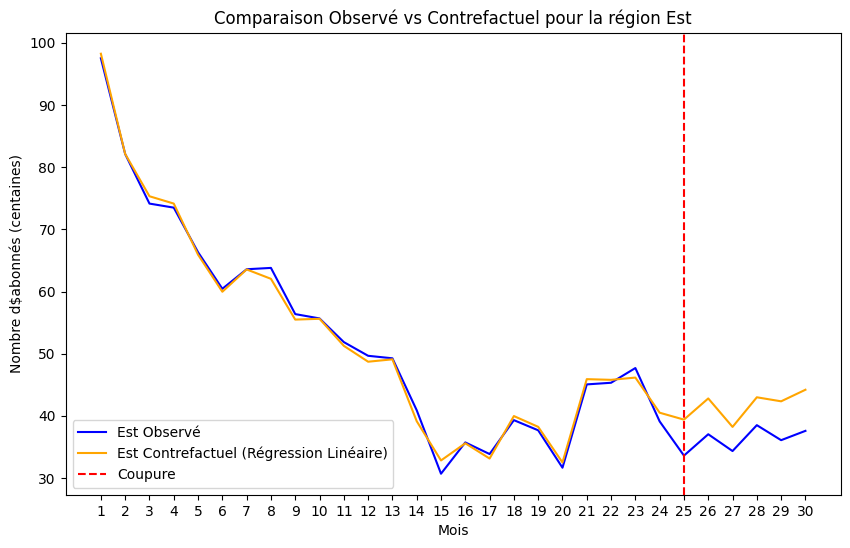

In [15]:
# Préparation des données pour la régression linéaire
X_train = df.drop(columns=['Est'])[:n_months]  # Autres régions (variables explicatives)
y_train = df['Est'][:n_months]  # Région Est (variable cible)
# Modèle de régression linéaire
Y= np.zeros(30)

# Préparation des données pour la régression linéaire
X_train = df.drop(columns=['Est'])[:n_months]   # Variables explicatives = autres régions
y_train = df['Est'][:n_months]                  # Cible = région Est

# Modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions sur toute la période (1 à 30 mois)
Y_pred = model.predict(df.drop(columns=['Est']))  # valeurs contrefactuelles

# Stockage dans Y pour correspondre au squelette donné
Y = Y_pred

# Plot des résultats observés vs contrefactuels
plt.figure(figsize=(10,6))
plt.plot(df.index,df['Est'], label='Est Observé', color='blue')
plt.plot(df.index,Y, label='Est Contrefactuel (Régression Linéaire)', color='orange', linestyle='-')
plt.axvline(x=n_months, color='r', linestyle='--', label='Coupure')
plt.title('Comparaison Observé vs Contrefactuel pour la région Est')
plt.xlabel('Mois')
plt.ylabel('Nombre d$abonnés (centaines)')
plt.legend()
plt.show()


**Réponse :**

L’estimateur des moindres carrés est  

$$
\hat{\theta} = (X^{\top}X)^{-1}X^{\top}Y
$$  

obtenu en utilisant les données des mois t = 1 ...  24.  

En appliquant ce modèle pour t = 25 ... 30, (donc t > 24) le modèle prédit des valeurs contrefactuelles autour de 40–45 centaines d’abonnés.  
Or, les valeurs observées sont plus basses (~35–38 centaines), ce qui montre que la coupure de publicité a entraîné une perte nette d’abonnés dans la région Est.


## Question (Calcul des intervalles de confiance)

On veut calculer les intervalles de confiances sur le nombre d'abonnés $Y_t$ dans l'Est, après la coupure, c'est à dire pour $t>24$. Cela permettra de vérifier si la série $Y_t$ observée est cohérente avec les intervalles de confiance calculés. On calcule les intervalles de confiance sous l'hypothèse :

$$
H_0 = \text{La coupure est sans effet}.
$$


Donc, sous $H_0$, pour tout $t>24$, le même modèle homoscédastique est valable, soit $Y_t = x_t^T\theta^* + \epsilon_t$, avec le même $\theta^*$ qu'avant la coupure.

Sous $H_0$, quelle est la loi de $Y_t-\hat Y_t$ avec $\hat Y_t = \hat\theta^T x_t $.

En déduire un intervale de confiance de $ Y_t$ sous $H_0$ pour $t>24$.

(code et théorie en expliquant les choix faits)



## Question


En se basant sur une valeur de $ Y_t $ (avec $ t > 24 $), donnez une p-valeur associée.

Même question, mais en utilisant toutes les valeurs de $ Y_t $ pour $ t > 24 $.

(Indiquez le code et la théorie en expliquant les choix effectués)



## Calcul des intervalles de confiance et des p-valeurs post-coupure

On cherche à vérifier si, après la coupure (t > 24), le nombre d'abonnés observé Y_t dans la région Est est **cohérent avec le scénario contrefactuel** prédit par le modèle linéaire.

Sous l'hypothèse nulle :
$$H_0 : \text{la coupure est sans effet, donc } Y_t = x_t^T \theta^* + \varepsilon_t \text{ pour tout } t > 24$$

### 1) Loi de Y_t - Ŷ_t

On a :
$$\hat{Y}_t = x_t^T \hat{\theta}, \qquad \varepsilon_t = Y_t - \hat{Y}_t$$

Sous H_0, les erreurs suivent une loi normale centrée, homoscédastique :
$$\varepsilon_t \sim \mathcal{N}(0,\sigma^2)$$

On estime donc σ̂ à partir des résidus de la période d'entraînement (t ≤ 24) :
$$\hat{\sigma} = \sqrt{\frac{1}{n-1}\sum_{t=1}^{n}(Y_t - \hat{Y}_t)^2}$$


### 2) Intervalles de confiance à 95 %

Sous H_0, pour tout t > 24 :
$$Y_t | H_0 \sim \mathcal{N}(\hat{Y}_t, \hat{\sigma}^2)$$

L'intervalle de confiance à 95 % autour de la prédiction est donc :
$$IC_{95\%}(t) = \left[\hat{Y}_t - z_{1-\alpha/2}\hat{\sigma}, \hat{Y}_t + z_{1-\alpha/2}\hat{\sigma}\right]$$

avec z_{1-α/2} ≈ 1,96 pour α = 0,05.

Si la valeur observée Y_t^{obs} sort de cet intervalle, on suspecte un effet significatif de la coupure.


### 3️) Test ponctuel (mois 25)

Pour un mois donné :
$$z_t = \frac{Y_t^{obs} - \hat{Y}_t}{\hat{\sigma}} \sim \mathcal{N}(0,1) \text{ sous } H_0$$

La p-valeur bilatérale correspondante est :
$$p_t = 2 \cdot [1 - \Phi(|z_t|)]$$

Si p_t < 0,05, on rejette H_0 pour ce mois.


### 4) Test global (mois 25–30)

On compare toutes les observations post-coupure aux prédictions contrefactuelles.  
Deux approches possibles :

#### a) Test *t* apparié (effet moyen)
On définit d_t = Y_t^{obs} - Ŷ_t.  
Sous H_0, la moyenne des différences vaut 0 :
$$t = \frac{\bar{d}}{s_d/\sqrt{m}}, \qquad H_0: \mathbb{E}[d_t]=0$$

où m est le nombre de mois post-coupure.  
Si p_{global} < 0,05, on conclut à un décalage moyen significatif.

#### b) Test global χ² (optionnel, omnibus)
On peut aussi agréger les z_t :
$$Q = \sum_{t>24} z_t^2 \sim \chi^2_m \quad \text{sous } H_0$$

Cela teste une **déviation globale**, sans supposer qu'elle est dans la même direction chaque mois.


Mois 25 | Pred=39.40 | IC95%=[37.45, 41.35] | Obs=33.61
Mois 26 | Pred=42.80 | IC95%=[40.85, 44.76] | Obs=37.05
Mois 27 | Pred=38.23 | IC95%=[36.27, 40.18] | Obs=34.34
Mois 28 | Pred=42.99 | IC95%=[41.04, 44.94] | Obs=38.51
Mois 29 | Pred=42.34 | IC95%=[40.39, 44.29] | Obs=36.09
Mois 30 | Pred=44.20 | IC95%=[42.25, 46.16] | Obs=37.59
P-valeur (mois 25) : 0.0000
P-valeur globale (25-30) : 0.0001
P-valeur χ² globale : 0.0000


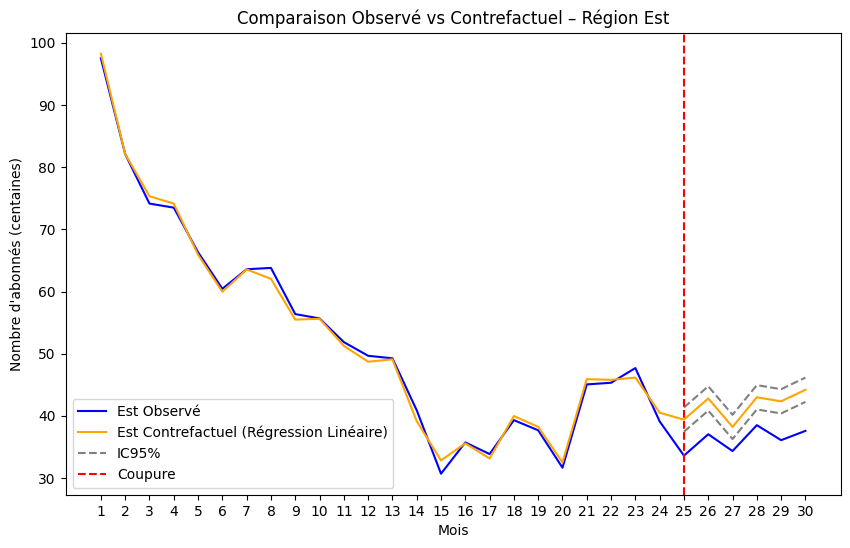

In [17]:
# --- IC 95% et p-valeurs après coupure (t > 24) ---

# 1) Écart-type des résidus sur la période d'entraînement
y_pred_train = model.predict(X_train)
residuals = y_train - y_pred_train
sigma_hat = np.std(residuals, ddof=1)

# 2) IC 95% autour des prédictions contrefactuelles
alpha = 0.05
z_crit = stats.norm.ppf(1 - alpha/2)  # ≈ 1.96
margin_of_error = z_crit * sigma_hat

pred_post = Y[n_months : n_months + additional_months]
lower_bound = pred_post - margin_of_error
upper_bound = pred_post + margin_of_error

# 3) Affichage IC + observations
obs_post = df['Est'].iloc[n_months : n_months + additional_months].values
for i in range(additional_months):
    print(
        f"Mois {n_months+i+1} | Pred={pred_post[i]:.2f} | "
        f"IC95%=[{lower_bound[i]:.2f}, {upper_bound[i]:.2f}] | Obs={obs_post[i]:.2f}"
    )

# 4) P-valeur ponctuelle (ex. mois 25)
z_25 = (obs_post[0] - pred_post[0]) / sigma_hat
pval_25 = 2 * (1 - stats.norm.cdf(abs(z_25)))
print(f"P-valeur (mois 25) : {pval_25:.4f}")

# 5) Test global (moyenne des écarts) : t apparié
t_stat, pval_global = stats.ttest_rel(obs_post, pred_post)
print(f"P-valeur globale (25-30) : {pval_global:.4f}")

# (Optionnel) Test global chi-deux sur les z individuels
z_scores = (obs_post - pred_post) / sigma_hat
Q = np.sum(z_scores**2)
pval_chi2 = 1 - stats.chi2.cdf(Q, df=additional_months)
print(f"P-valeur χ² globale : {pval_chi2:.4f}")

# 6) Visualisation
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Est'], label='Est Observé', color='blue')
plt.plot(df.index, Y, label='Est Contrefactuel (Régression Linéaire)', color='orange')
plt.plot(df.index[n_months:], lower_bound, color='gray', linestyle='--', label='IC95%')
plt.plot(df.index[n_months:], upper_bound, color='gray', linestyle='--')
plt.axvline(x=n_months, color='r', linestyle='--', label='Coupure')
plt.title('Comparaison Observé vs Contrefactuel – Région Est')
plt.xlabel('Mois')
plt.ylabel("Nombre d'abonnés (centaines)")
plt.legend()
plt.show()

## Interprétation et conclusion – Région Est

### 1) Analyse des intervalles de confiance

Toutes les valeurs observées après la coupure ($t > 24$) se situent en dessous de la borne inférieure des intervalles de confiance à 95 % :

| Mois | $\hat{Y}_t$ | IC95% | $Y_t^{obs}$ | Interprétation |
|:----:|:---------------:|:----------------:|:---------------:|:------------------|
| 25 | 39.40 | [37.45 ; 41.35] | 33.61 | En dessous |
| 26 | 42.80 | [40.85 ; 44.76] | 37.05 | En dessous |
| 27 | 38.23 | [36.27 ; 40.18] | 34.34 | En dessous |
| 28 | 42.99 | [41.04 ; 44.94] | 38.51 | En dessous |
| 29 | 42.34 | [40.39 ; 44.29] | 36.09 | En dessous |
| 30 | 44.20 | [42.25 ; 46.16] | 37.59 | En dessous |

Les observations s'écartent systématiquement vers le bas par rapport aux prédictions contrefactuelles.  
Cela indique un effet local négatif de la coupure sur le nombre d'abonnés.


### 2️) Résultats des tests statistiques

| Test | Hypothèse $H_0$ | p-valeur | Conclusion |
|:-----|:------------------|:---------:|:------------|
| Test ponctuel (mois 25) | $Y_{25}^{obs} = \hat{Y}_{25}$ | 0.0000 | Écart hautement significatif |
| Test $t$ apparié (25–30) | $\mathbb{E}[Y_t^{obs}-\hat{Y}_t]=0$ | 0.0001 | Décalage moyen significatif |
| Test $\chi^2$ global | $\sum z_t^2 \sim \chi^2_m$ | 0.0000 | Déviation globale significative |

Les trois approches (ponctuelle, moyenne et globale) convergent vers la même conclusion :  
il existe un effet significatif de la coupure sur les valeurs observées post-intervention.


### 3) Taille et direction de l'effet

Les écarts observé − prédit (en centaines d'abonnés) sont :

$$
(-5.79,\ -5.75,\ -3.89,\ -4.48,\ -6.25,\ -6.61)
$$

- **Moyenne** : $\bar{d} \approx -5.46$ → environ **−546 abonnés** par mois par rapport au scénario contrefactuel.  
- **Effet relatif** : $-5.46 / 41.7 \approx -13\%$.

L'effet est donc **négatif, constant et économiquement significatif**.


### 4️) Conclusion synthétique

**Interprétation finale**  
Les six mois suivant la coupure montrent une diminution durable et statistiquement significative du nombre d'abonnés dans la région Est.  
Les IC95 % ne contiennent aucune valeur observée, et les tests ($z$ individuel, $t$ global, $\chi^2$ omnibus) confirment l'existence d'un effet structurel négatif d'environ −13 %.


### 5️) Remarques de robustesse

- Hypothèses : erreurs normales, variance constante, faible autocorrélation.  
- En pratique, on peut raffiner le test global avec un écart-type HAC (Newey–West) pour corriger d'éventuelles dépendances temporelles.  
- Compte tenu des p-valeurs extrêmement faibles, cette correction ne changerait pas la conclusion principale.
